In [210]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import datetime
import os

In [211]:
try:
    os.chdir("D:/빅데이터 윈터스쿨 제주도자료")
    print("Current Working Directory is changed.")
except OSError:
    print("Can't change Current Working Directory.") 

Current Working Directory is changed.


In [212]:
import warnings
warnings.filterwarnings('ignore')

In [213]:
plt.style.use('ggplot')

In [243]:
data2 = pd.read_csv('bus_bts.csv', encoding='utf8')
data2.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [241]:
data = pd.read_csv('train.csv', encoding='utf8')
data.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [242]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415423 entries, 0 to 415422
Data columns (total 21 columns):
id               415423 non-null int64
date             415423 non-null datetime64[ns]
bus_route_id     415423 non-null int64
in_out           415423 non-null object
station_code     415423 non-null int64
station_name     415423 non-null object
latitude         415423 non-null float64
longitude        415423 non-null float64
6~7_ride         415423 non-null float64
7~8_ride         415423 non-null float64
8~9_ride         415423 non-null float64
9~10_ride        415423 non-null float64
10~11_ride       415423 non-null float64
11~12_ride       415423 non-null float64
6~7_takeoff      415423 non-null float64
7~8_takeoff      415423 non-null float64
8~9_takeoff      415423 non-null float64
9~10_takeoff     415423 non-null float64
10~11_takeoff    415423 non-null float64
11~12_takeoff    415423 non-null float64
18~20_ride       415423 non-null float64
dtypes: datetime64[ns](1), fl

In [216]:
data['ddate'] = data['date'].dt.day

In [217]:
data['weekday'] = data['date'].dt.weekday

In [218]:
data['in_out'] = data['in_out'].map({'시내':0,'시외':1})

In [219]:
data.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,ddate,weekday
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1,6
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1,6
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,1,6
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,6


노선의 일별 탑승자 수 

In [225]:
m_count = data[['ddate','bus_route_id','6~7_ride','7~8_ride','8~9_ride','in_out']] # 날짜,노선,탑승자수
m_count.head()

,ddate,bus_route_id,6~7_ride,7~8_ride,8~9_ride,in_out
0,1,4270000,0.0,1.0,2.0,1
1,1,4270000,1.0,4.0,4.0,1
2,1,4270000,1.0,1.0,0.0,1
3,1,4270000,0.0,17.0,6.0,0
4,1,4270000,0.0,0.0,0.0,0


In [247]:
m_count_filter = m_count[data['in_out'] == 0]
m_count_filter = m_count[data['bus_route_id'] == 31580000]
m_count_filter.head()

,ddate,bus_route_id,6~7_ride,7~8_ride,8~9_ride,in_out
9978,1,31580000,3.0,0.0,1.0,0
9979,1,31580000,1.0,0.0,0.0,0
9980,1,31580000,7.0,14.0,2.0,1
9981,1,31580000,2.0,0.0,0.0,0
9982,1,31580000,1.0,3.0,2.0,0


In [250]:
m_count_filter['6~9_ride'] = m_count['6~7_ride'] + m_count['7~8_ride'] + m_count['8~9_ride']
m_count_filter.head()

,ddate,bus_route_id,6~7_ride,7~8_ride,8~9_ride,in_out,6~9_ride
9978,1,31580000,3.0,0.0,1.0,0,4.0
9979,1,31580000,1.0,0.0,0.0,0,1.0
9980,1,31580000,7.0,14.0,2.0,1,23.0
9981,1,31580000,2.0,0.0,0.0,0,2.0
9982,1,31580000,1.0,3.0,2.0,0,6.0


In [228]:
m_count_filter_groupby = m_count_filter.groupby(by=['ddate'])['6~9_ride'].sum()
m_count_filter_groupby.head()

ddate
1    101.0
2    144.0
3    129.0
4    142.0
5    143.0
Name: 6~9_ride, dtype: float64

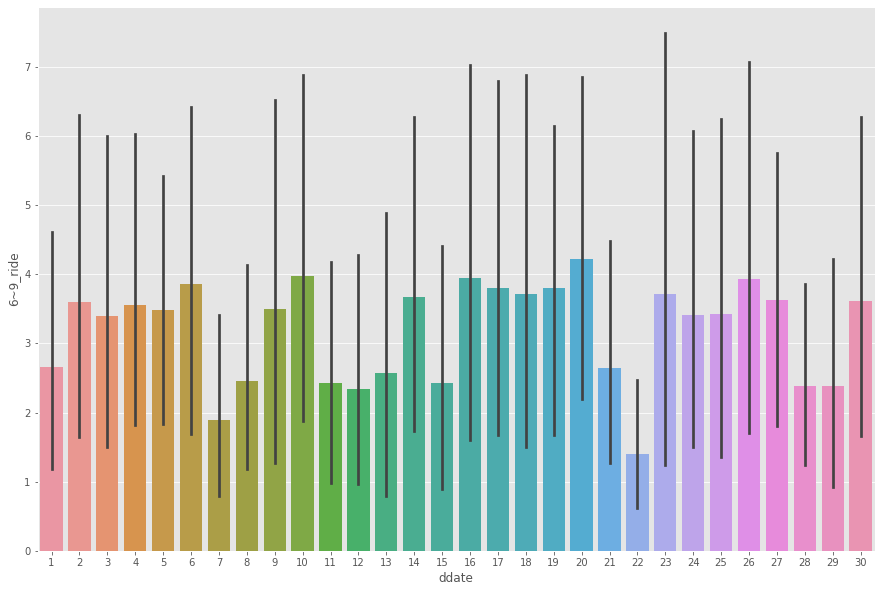

In [282]:
plt.figure(figsize=(15, 10))
m_count_filter_groupby_df = m_count_filter.groupby(by=['ddate'])['6~9_ride'].sum()
m_count_filter_groupby_df = m_count_filter_groupby_df.to_frame().reset_index()

sns.barplot('ddate','6~9_ride',data = m_count_filter)
plt.show()

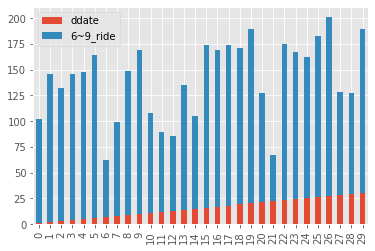

In [277]:
df2=data['m_count_filter_groupby_df']
columns = m_count['6~7_ride','7~8_ride','8~9_ride']
m_count_filter_groupby_df.plot(kind='bar', stacked=True)
plt.show()

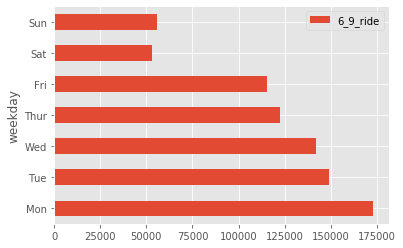

In [237]:
week_sum_df = data[['weekday','6~7_ride','7~8_ride','8~9_ride']]
week_sum_df['6_9_ride'] = week_sum_df['6~7_ride'] + week_sum_df['7~8_ride'] + week_sum_df['8~9_ride']
week_69_sum_df = week_sum_df.groupby(by=['weekday'])['6_9_ride'].sum()

week_69_sum_to_df['weekday'] = ["Mon", "Tue", 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
week_69_sum_to_df.plot(kind='barh', x = 'weekday', y= '6_9_ride')


In [14]:
data_airport = data[data['station_name'].str.contains("")].drop_duplicates('bus_route_id')
data_airport[data_airport['in_out'] == 1]

bus_route_id_airport = data_airport[data_airport['in_out'] == 1]['bus_route_id']    
criteria = bus_route_id_airport.values.tolist()
    
bus_route_station_data_filter = data[data.bus_route_id.isin(criteria) & data['in_out'] == 1]
bus_route_station_data_filter

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6
6,6,2019-09-01,4270000,1,1660,제주국제컨벤션센터중문대포해안주상절리대,33.24309,126.42472,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,6
7,7,2019-09-01,4270000,1,1666,창천리,33.26598,126.37082,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6
8,8,2019-09-01,4270000,1,1726,강정농협,33.23603,126.47827,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,6
10,10,2019-09-01,4270000,1,2009,뉴경남호텔,33.24613,126.55957,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,6
12,12,2019-09-01,4270000,1,2014,하얏트호텔,33.24511,126.40579,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,6
13,13,2019-09-01,4270000,1,2094,한국콘도입구,33.25024,126.41022,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
14,14,2019-09-01,4270000,1,2095,켄싱턴제주호텔입구,33.25037,126.40992,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,6


In [15]:
bus_route_station_data_filter = data[ data['in_out'] == 1]

In [16]:
# 6~9 승차자수 합산

bus_route_station_data_filter['6_9_ride'] = bus_route_station_data_filter['6~7_ride'] + bus_route_station_data_filter['7~8_ride'] + bus_route_station_data_filter['8~9_ride']
#bus_route_station_data_filter.head(10)

In [17]:
# 날짜별(일자) 버스루트별 in_out별 정류소별
bus_route_station_data_filter_groupby = bus_route_station_data_filter.groupby(by=['bus_route_id','date','in_out','station_code'])['6_9_ride'].sum()
#bus_route_station_data_filter_groupby.head(100)

In [18]:
#평균구하기
#mean_line = np.mean(bus_route_station_sum_df['6_9_ride'])
mean_line = np.mean(bus_route_station_data_filter['6_9_ride'])


In [19]:
bus_route_station_data_filter['bus_route_id'].drop_duplicates()

0          4270000
25         4280000
61         8170000
81        20010000
91        20040000
92        20050000
337       21410000
443       21520000
548       21880000
862       22340000
908       22360000
979       22440000
1293      22540000
1415      22560000
1526      22580000
1619      23000000
1672      23010000
1730      23020000
1792      23030000
2079      23100000
2136      23110000
2188      23120000
2238      23130000
2556      23220000
2599      23230000
3287      23490000
3329      23500000
3379      23510000
3433      23520000
3490      23560000
            ...   
26959     21460000
30556     23530000
36860     29220000
38269     30170000
53269     30190000
55508     31890000
61183     23680000
68307     29960000
70487     31650000
83799     29950000
86627     32030000
97193     31930000
111173    22550000
113896    23630000
129279    23600000
131519    26070000
135558    29120000
136235    29520000
139008    31660000
150953    29020000
152273    29940000
153286    30

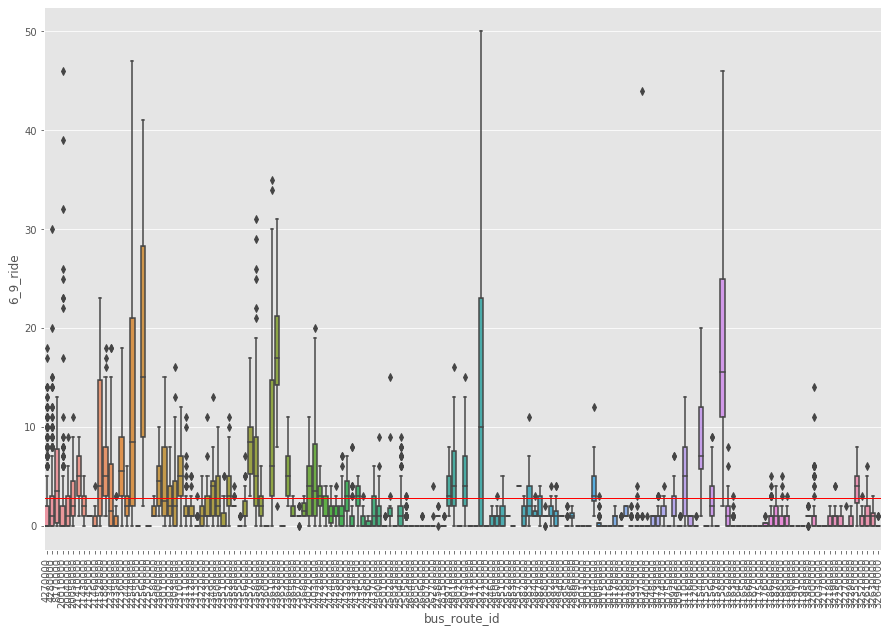

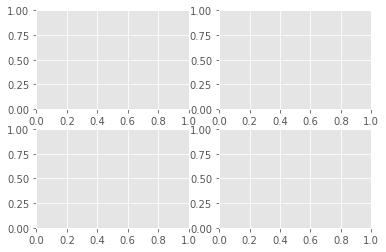

In [45]:
# 하루 단위
# box plot 그리기 위해서는 x축(노선), y축(승차인원), data 필요
plt.figure(figsize=(15, 10))

bus_route_station_sum_df = bus_route_station_data_filter.groupby(by=['bus_route_id','date','station_code','in_out'])['6_9_ride'].sum()
# series to dataframe
bus_route_station_sum_df = bus_route_station_sum_df.to_frame().reset_index()
#print(bus_route_station_sum_df)

# csv 파일로 저장
#bus_route_station_sum_df.to_csv("bus_route_station_sum_df.csv", mode='w')

# box plot
sns.boxplot("bus_route_id","6_9_ride", data = bus_route_station_sum_df)
#평균 선 그리기
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.xticks(rotation=90)
plt.rc('xtick',labelsize = 10)
fig = plt.figure()
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)
plt.show()

     bus_route_id  station_code  in_out  6_9_ride
0         4270000           344       1     213.0
1         4270000           357       1     273.0
2         4270000           432       1     202.0
3         4270000          1660       1       7.0
4         4270000          1662       1       0.0
5         4270000          1666       1      16.0
6         4270000          1726       1      42.0
7         4270000          2006       1       0.0
8         4270000          2009       1       1.0
9         4270000          2010       1       1.0
10        4270000          2012       1       0.0
11        4270000          2014       1       3.0
12        4270000          2021       1       0.0
13        4270000          2094       1      34.0
14        4270000          2095       1       0.0
15        4270000          2114       1       5.0
16        4270000          2697       1       2.0
17        4270000          2699       1       0.0
18        4270000          2883       1       0.0


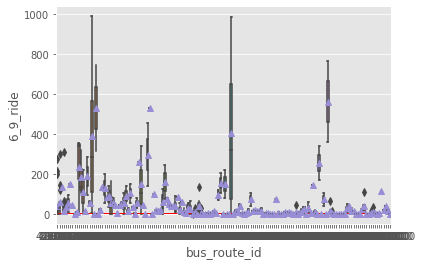

In [21]:
# 한달 통합
# box plot 그리기 위해서는 x축(노선), y축(승차인원), data 필요

bus_route_station_sum_df = bus_route_station_data_filter.groupby(by=['bus_route_id','station_code','in_out'])['6_9_ride'].sum()

# series to dataframe
bus_route_station_sum_df = bus_route_station_sum_df.to_frame().reset_index()
print(bus_route_station_sum_df)

# box plot
sns.boxplot("bus_route_id","6_9_ride", data = bus_route_station_sum_df, showmeans=True)
#평균 선 그리기
plt.axhline(y=mean_line, color='r', linewidth=1)
plt.show()

2.7519861331792574


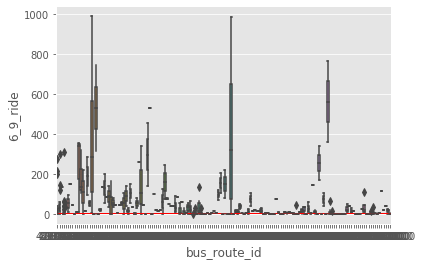

In [22]:
fig,ax=plt.subplots()
sns.boxplot("bus_route_id","6_9_ride", data = bus_route_station_sum_df)
#sns.lineplot(y=mean_line)
#grid = sns.JointGrid(iris.petal_length, iris.petal_width, space=0, size=6, ratio=50)
#ax.plot(mean_line,'r-o',linewidth=3)
#ax.plot(m.values,'r-o',linewidth=4)
#grid.plot_joint(plt.mean_line, color="g")
#sns.lineplot(x="bus_route_id", y="6_9_ride", data=np.mean(bus_route_station_sum_df['6_9_ride']))
print(mean_line)
#plt.plot(mean_line)
plt.axhline(y=mean_line, color='r', linewidth=1)

plt.show()


In [23]:
data.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6


In [24]:
data_airport = data[data['station_name'].str.contains("제주버스터미널")].drop_duplicates()
data_airport.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
93,93,2019-09-01,21000000,0,149,제주버스터미널,33.49993,126.51486,0.0,0.0,...,4.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6
112,112,2019-09-01,21010000,0,150,제주버스터미널,33.50020,126.51471,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,2.0,6.0,8.0,0.0,6
144,144,2019-09-01,21070000,0,150,제주버스터미널,33.50020,126.51471,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,6
223,223,2019-09-01,21180000,0,149,제주버스터미널,33.49993,126.51486,0.0,4.0,...,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,6
237,237,2019-09-01,21220000,0,149,제주버스터미널,33.49993,126.51486,0.0,0.0,...,22.0,8.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,6


In [25]:
data_airport = data[data['station_name'].str.contains("제주국제공항")].drop_duplicates('bus_route_id')
#bus_route_station_sum_df = data_airport.groupby(by=['bus_route_id','station_code','in_out'])
bus_route_station_sum_df.head()

,bus_route_id,station_code,in_out,6_9_ride
0,4270000,344,1,213.0
1,4270000,357,1,273.0
2,4270000,432,1,202.0
3,4270000,1660,1,7.0
4,4270000,1662,1,0.0


In [ ]:
data_airport[data_airport['in_out'] == 1]

In [ ]:
data_airport = data[data['station_name'].str.contains("국제공항")].drop_duplicates('bus_route_id')
data_airport[data_airport['in_out'] == 0]